In [67]:
import bs4
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import re
import csv
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [133]:
page = 1

brand_name=[]
price=[]
tv_dis=[]
tv_rate=[]
display=[]
hd=[]
os=[]

reso=[]
sound=[]

while page <= 20:
    page = page + 1
    url=f"https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&param=1&wid=10.productCard.PMU_V2_5&page={page}"
    #url=f"https://www.flipkart.com/televisions/pr?sid=ckf%2Cczl&p%5B%5D=facets.screen_size%255B%255D%3D48%2B-%2B55%2Binch&param=1&wid=10.productCard.PMU_V2_5&page={page}"
    # url=f"https://www.flipkart.com/search?count=40&otracker=CLP_filters&p%5B%5D=facets.smart_tv%255B%255D%3DYes&sid=ckf%2Fczl&otracker=nmenu_sub_TVs+and+Appliances_0_Smart+and+Ultra+HD&otracker=nmenu_sub_TVs+%26+Appliances_0_Smart+%26+Ultra+HD&otracker=nmenu_sub_TVs+%26+Appliances_0_Smart+%26+Ultra+HD&p%5B%5D=facets.price_range.from%3DMin&p%5B%5D=facets.price_range.to%3D60000&p%5B%5D=facets.resolution%255B%255D%3DUltra%2BHD%2B%25284K%2529&p%5B%5D=facets.brand%255B%255D%3DSAMSUNG&p%5B%5D=facets.brand%255B%255D%3DOnePlus&p%5B%5D=facets.brand%255B%255D%3DLG&p%5B%5D=facets.brand%255B%255D%3DSONY&p%5B%5D=facets.brand%255B%255D%3DPanasonic&p%5B%5D=facets.brand%255B%255D%3DHaier&p%5B%5D=facets.brand%255B%255D%3DMOTOROLA&p%5B%5D=facets.brand%255B%255D%3DHisense&p%5B%5D=facets.brand%255B%255D%3DMi&p%5B%5D=facets.brand%255B%255D%3DLloyd&p%5B%5D=facets.brand%255B%255D%3DTOSHIBA&p%5B%5D=facets.brand%255B%255D%3DVu&p%5B%5D=facets.brand%255B%255D%3DTCL&page={page}"
    response = requests.get(url)
    html = response.content    
    soup = bs(html,'html.parser')
    container = soup.find_all('div', class_='_2kHMtA')
    for ele in container:
      name=ele.find('div',class_='_4rR01T')
      dis_size= re.findall(r'\d+[.]?\d+[\s](?:cm|mm|inch)',name.text.lower())
      # print(name.text,'>>',dis_size)
      display.append(dis_size[0].split(' ')[0])
      # print("jfgj",dis_size[0].split(' ')[0])
      brand_name.append(name.text.split(dis_size[0])[0])
      # # print(len(brand_name))

      disprice=ele.find('div', class_='_30jeq3 _1_WHN1')
      # print("jfgj",disprice)
      price.append(disprice.text) if type(disprice) == bs4.element.Tag else price.append(np.nan) 
      # print(len(price))

      discount=ele.find('div', class_='_3Ay6Sb')
      tv_dis.append(discount.text) if type(discount) == bs4.element.Tag else tv_dis.append(np.nan) 

      rating=ele.find('div', class_='_3LWZlK')
      tv_rate.append(rating.text) if type(rating) == bs4.element.Tag else tv_rate.append(np.nan) 
  
      specification = ele.find_all('li',class_="rgWa7D")
      os_status=False
      sound_status=False
      for spec in specification:
        #print("spec ",spec)
        s= spec.text
        if "Pixels" in s:
            sreso= re.findall(r'\d+[\s]?[x][\s]?\d+[\s]?', s)
            reso.append(sreso[0]) if sreso  else reso.append(np.nan)
        if "Speaker Output" in s:
            sound_status=True
            speaker = re.findall(r'\d+[\s]?',s)
            sound.append(speaker[0]) if speaker else sound.append(np.nan)
        if "Operating System:" in s:
            os_status=True
            os.append(s.split('Operating System:')[1].strip()) if s else os.append(np.nan)
      if not os_status:
        os.append(np.nan)
      if not sound_status:
        sound.append(np.nan)        

Check all lists length have same length to create a dataframe

In [134]:
print(len(brand_name))
print(len(price))
print(len(tv_dis))
print(len(tv_rate))
print(len(reso))
print(len(sound))
print(len(display))
print(len(os))

480
480
480
480
480
480
480
480


In [135]:
df=pd.DataFrame({'Product_Name':brand_name,"Price":price,"Total Discount":tv_dis,'Rating':tv_rate,'Display_size':display ,'Operating_system': os,'Screen_Resolution':reso,'Speaker Output':sound})
df.head()

,Product_Name,Price,Total Discount,Rating,Display_size,Operating_system,Screen_Resolution,Speaker Output
0,Vu Premium,"₹38,999",48% off,4.4,139,Android,3840 x 2160,30
1,Mi 4C,"₹14,999",25% off,4.3,80,Android,1366 x 768,20
2,Mi 5X,"₹41,999",30% off,4.2,125.7,Android,3840 x 2160,40
3,SAMSUNG,"₹17,499",12% off,4.3,80,Tizen,1366 x 768,20
4,TCL P615,"₹33,999",46% off,4.4,126,NaN,3840x2160,24


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Product_Name       480 non-null    object
 1   Price              480 non-null    object
 2   Total Discount     452 non-null    object
 3   Rating             431 non-null    object
 4   Display_size       480 non-null    object
 5   Operating_system   405 non-null    object
 6   Screen_Resolution  465 non-null    object
 7   Speaker Output     477 non-null    object
dtypes: object(8)
memory usage: 30.1+ KB


**Preprocessing Stage**

Check any column have missing values

In [137]:
df.isnull().sum()

Product_Name          0
Price                 0
Total Discount       28
Rating               49
Display_size          0
Operating_system     75
Screen_Resolution    15
Speaker Output        3
dtype: int64

Clean column values suitable for processing

In [138]:
# removing Rs sign from Price Column
df['Price']=df['Price'].replace({'₹':""},regex=True)
df['Price'] = df['Price'].replace({',' : ''}, regex=True)

# Removing % sign from Total Discount Column
df['Total Discount']=df['Total Discount'].str.split('%').str[0]
df.head()

,Product_Name,Price,Total Discount,Rating,Display_size,Operating_system,Screen_Resolution,Speaker Output
0,Vu Premium,38999,48,4.4,139,Android,3840 x 2160,30
1,Mi 4C,14999,25,4.3,80,Android,1366 x 768,20
2,Mi 5X,41999,30,4.2,125.7,Android,3840 x 2160,40
3,SAMSUNG,17499,12,4.3,80,Tizen,1366 x 768,20
4,TCL P615,33999,46,4.4,126,NaN,3840x2160,24


In [139]:
# print(df['Rating'].unique())
# print(df['Rating'].value_counts())


In [140]:
# print(df['Total Discount'].unique())
# print(df['Total Discount'].value_counts())

In [141]:
# rating_mode = df['Rating'].mode()
# rating_mode

In [142]:
df['Total Discount'].fillna(0, inplace=True)


In [143]:
df['Operating_system'].value_counts()

Android          224
Tizen             86
WebOS             39
Android Based     16
Linux based       14
VIDAA             14
Google TV          5
Linux              5
HomeOS             2
Name: Operating_system, dtype: int64

In [144]:
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)
df['Total Discount'].fillna(df['Total Discount'].mode()[0], inplace=True)
df['Screen_Resolution'].fillna(df['Screen_Resolution'].mode()[0], inplace=True)
df['Speaker Output'].fillna(df['Speaker Output'].mode()[0], inplace=True)
df['Operating_system'].fillna(df['Operating_system'].mode()[0], inplace=True)

In [145]:
df.head()

,Product_Name,Price,Total Discount,Rating,Display_size,Operating_system,Screen_Resolution,Speaker Output
0,Vu Premium,38999,48,4.4,139,Android,3840 x 2160,30
1,Mi 4C,14999,25,4.3,80,Android,1366 x 768,20
2,Mi 5X,41999,30,4.2,125.7,Android,3840 x 2160,40
3,SAMSUNG,17499,12,4.3,80,Tizen,1366 x 768,20
4,TCL P615,33999,46,4.4,126,Android,3840x2160,24


In [146]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object .
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'Operating_system'.
df['Operating_system']= label_encoder.fit_transform(df['Operating_system'])
 
df['Operating_system'].unique()

array([0, 6, 1, 8, 7, 5, 4, 2, 3])

In [147]:
df.isnull().sum()

Product_Name         0
Price                0
Total Discount       0
Rating               0
Display_size         0
Operating_system     0
Screen_Resolution    0
Speaker Output       0
dtype: int64

In [148]:
df['Screen_Resolution'].value_counts()

3840 x 2160     326
1366 x 768       75
1920 x 1080      59
3840x2160        14
3860 x 2160       2
1080 x 1920       1
3840 x 2160       1
1366x768          1
1366 x 786        1
Name: Screen_Resolution, dtype: int64

In [149]:
# Encode labels in column 'Screen_Resolution'.
df['Screen_Resolution']= label_encoder.fit_transform(df['Screen_Resolution'])
 
df['Screen_Resolution'].unique()

array([6, 1, 7, 4, 8, 2, 0, 3, 5])

In [150]:
df.head()

,Product_Name,Price,Total Discount,Rating,Display_size,Operating_system,Screen_Resolution,Speaker Output
0,Vu Premium,38999,48,4.4,139,0,6,30
1,Mi 4C,14999,25,4.3,80,0,1,20
2,Mi 5X,41999,30,4.2,125.7,0,6,40
3,SAMSUNG,17499,12,4.3,80,6,1,20
4,TCL P615,33999,46,4.4,126,0,7,24


In [151]:
# Save cleaned and processed data to a CSV file
df.to_csv('DatsSetCap.csv', index=False)

In [152]:
df1=pd.read_csv('DatsSetCap.csv')
df1.head()

,Product_Name,Price,Total Discount,Rating,Display_size,Operating_system,Screen_Resolution,Speaker Output
0,Vu Premium,38999,48,4.4,139.0,0,6,30
1,Mi 4C,14999,25,4.3,80.0,0,1,20
2,Mi 5X,41999,30,4.2,125.7,0,6,40
3,SAMSUNG,17499,12,4.3,80.0,6,1,20
4,TCL P615,33999,46,4.4,126.0,0,7,24


Correlation between the features

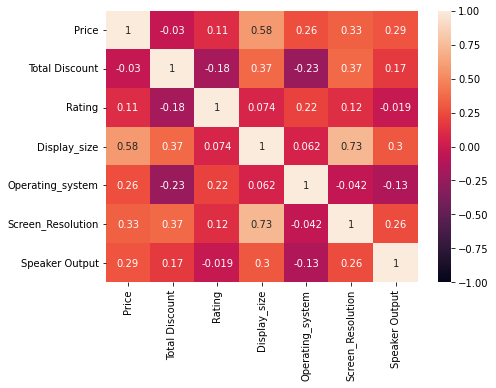

In [153]:
plt.figure(figsize=(7,5))
sns.heatmap(df1.corr(),annot=True,vmin=-1)

From the heatmap generated using correlation we observed that price depends display size, screen resolution and speaker output.

Plot the display size, screen resolution and speaker output relation to Price

Text(0.5, 1.0, 'Screen_Resolution v/s Price')

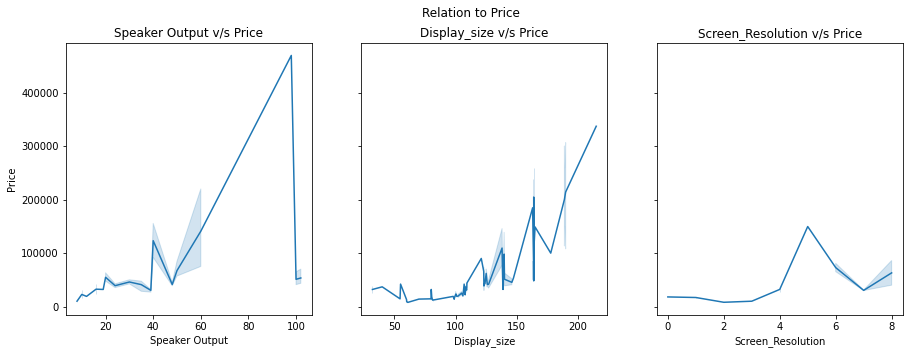

In [160]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Relation to Price')

# Plot Speaker Output v/s Price
sns.lineplot(ax=axes[0], x=df1['Speaker Output'], y=df1['Price'])
axes[0].set_title("Speaker Output v/s Price")

# Plot Display_size v/s Price
sns.lineplot(ax=axes[1], x=df1['Display_size'], y=df1['Price'])
axes[1].set_title("Display_size v/s Price")

# Plot Screen_Resolution v/s Price
sns.lineplot(ax=axes[2], x=df1['Screen_Resolution'], y=df1['Price'])
axes[2].set_title("Screen_Resolution v/s Price")


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


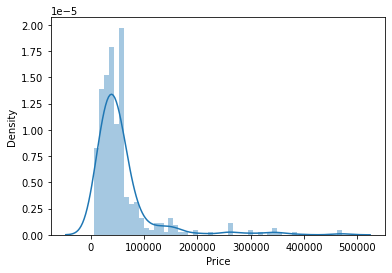

In [161]:
sns.distplot(df1.Price)

Text(0.5, 1.0, 'Screen_Resolution v/s Price')

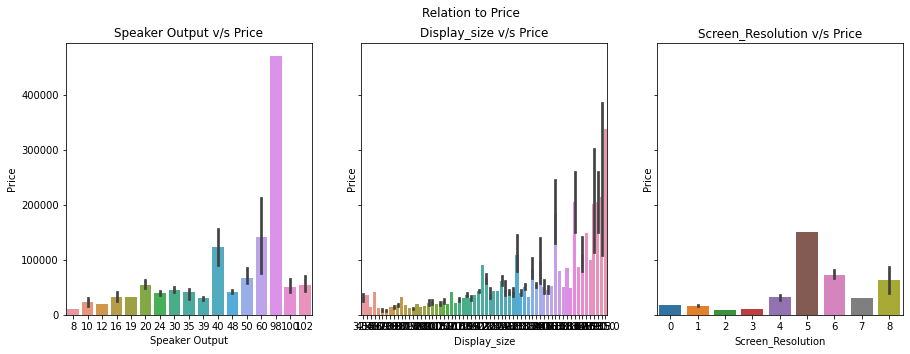

In [162]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Relation to Price')

# Plot Speaker Output v/s Price
sns.barplot(ax=axes[0], x=df1['Speaker Output'], y=df1['Price'])
axes[0].set_title("Speaker Output v/s Price")

# Plot Display_size v/s Price
sns.barplot(ax=axes[1], x=df1['Display_size'], y=df1['Price'])
axes[1].set_title("Display_size v/s Price")

# Plot Screen_Resolution v/s Price
sns.barplot(ax=axes[2], x=df1['Screen_Resolution'], y=df1['Price'])
axes[2].set_title("Screen_Resolution v/s Price")